### Importing the libraries

In [144]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import os
import nltk
import numpy as np
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('tagsets')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/vishesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vishesh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vishesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package tagsets to /Users/vishesh/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/vishesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [273]:
n_docs = 100
n_topics = 5
n_iters = 5
alpha = 1
beta = 1

# For MALLET
num_topics = 20
num_iters = 1000
show_interval = 100

In [2]:
%matplotlib inline


### Setting up path and filelist parameters

In [3]:
path = "./steam_reviews-master/data"                                  
file_list = [x for x in os.listdir("./steam_reviews-master/data/") if x.endswith(".jsonlines")]

In [4]:
path

'./steam_reviews-master/data'

In [5]:
file_list

['The_Elder_Scrolls_V.jsonlines',
 'Garrys_Mod.jsonlines',
 'Sid_Meiers_Civilization_5.jsonlines',
 'Dota_2.jsonlines',
 'Grand_Theft_Auto_V.jsonlines',
 'Warframe.jsonlines',
 'Team_Fortress_2.jsonlines',
 'Counter_Strike.jsonlines',
 'Football_Manager_2015.jsonlines',
 'Counter_Strike_Global_Offensive.jsonlines',
 'Arma_3.jsonlines']

### Reading all source jsonline files(F0) to a pandas dataframe(F1) format 

In [6]:
rev_all = pd.DataFrame()
for file in file_list:
    revision_file = str(path) + "/" + str(file)
    with open(revision_file) as f:
        data = []
        for line in f:
            data.append(json.loads(line))
    rev_new = json_normalize(data)
    rev_new['file'] = file
    frames = [rev_all, rev_new]
    rev_all = pd.concat(frames)

In [7]:
rev_all.shape

(79437, 30)

In [8]:
rev_all

,achievement_progress.num_achievements_attained,achievement_progress.num_achievements_percentage,achievement_progress.num_achievements_possible,date_posted,date_updated,found_helpful_percentage,friend_player_level,num_badges,num_comments,num_found_funny,...,orig_url,profile_url,rating,review,review_url,steam_id_number,total_game_hours,total_game_hours_last_two_weeks,username,file
0,82.0,0.931818,88.0,"Dec 26, 2013, 1:06PM",None,0.953098,19.0,15.0,261,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/profiles/76561198025...,Recommended,"This is the game the never, ever ends. I picke...",http://steamcommunity.com/profiles/76561198025...,76561198025183555,4653.0,0.0,WafflePotatoPancake,The_Elder_Scrolls_V.jsonlines
1,75.0,1.000000,75.0,"Dec 18, 2013, 1:07PM",None,0.950018,25.0,20.0,281,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/thardrain,Recommended,Ruined my life. Five stars.,http://steamcommunity.com/id/thardrain/recomme...,thardrain,3210.9,0.0,Robn,The_Elder_Scrolls_V.jsonlines
2,44.0,0.500000,88.0,"Jun 14, 2014, 4:32PM",None,0.898292,12.0,13.0,60,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/profiles/76561198112...,Recommended,I was stacking books on a shelf in my house in...,http://steamcommunity.com/profiles/76561198112...,76561198112775620,92.5,0.0,Dovah,The_Elder_Scrolls_V.jsonlines
3,NaN,NaN,NaN,"Nov 25, 2013, 11:44AM","Nov 25, 2013, 11:44AM",0.881725,NaN,NaN,11,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/Rgeers,Recommended,"Best game I ever bought. In this game, you'll ...",http://steamcommunity.com/id/Rgeers/recommende...,Rgeers,313.1,0.0,Rgeers,The_Elder_Scrolls_V.jsonlines
4,0.0,0.000000,40.0,"Jun 29, 2014, 5:30PM",None,0.873712,84.0,114.0,101,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/Terminally-Chill,Recommended,Playing Skyrim is like masturbating. Feels goo...,http://steamcommunity.com/id/Terminally-Chill/...,Terminally-Chill,794.9,2.3,-AoG-SHARKE BYTE [FYG],The_Elder_Scrolls_V.jsonlines
5,0.0,0.000000,46.0,"Dec 19, 2013, 10:36AM",None,0.892216,37.0,77.0,34,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/CinemaFromage,Recommended,"Day 1: This game sure looks nice, there's just...",http://steamcommunity.com/id/CinemaFromage/rec...,CinemaFromage,40.9,0.0,CinemaFromage,The_Elder_Scrolls_V.jsonlines
6,22.0,0.314286,70.0,"Apr 4, 2015, 11:44AM",None,0.880457,15.0,15.0,42,44,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/alittlebrownbat,Recommended,THE ELDER SCROLLS V: SKYRIM Sit through a cuts...,http://steamcommunity.com/id/alittlebrownbat/r...,alittlebrownbat,278.6,0.6,Vesper,The_Elder_Scrolls_V.jsonlines
7,66.0,0.880000,75.0,"Dec 28, 2013, 12:11PM",None,0.893843,12.0,8.0,13,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/TwitchWestguard,Recommended,"At first you are like this games fun, then you...",http://steamcommunity.com/id/TwitchWestguard/r...,TwitchWestguard,812.9,199.1,Westguard,The_Elder_Scrolls_V.jsonlines
8,52.0,0.693333,75.0,"Jul 17, 2014, 11:46PM","May 9, 2015, 1:23AM",0.883871,31.0,23.0,24,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/profiles/76561198041...,Recommended,"If I could, I would take this game out, buy it...",http://steamcommunity.com/profiles/76561198041...,76561198041284313,525.2,0.5,[KoD] Colonel Sanders,The_Elder_Scrolls_V.jsonlines
9,5.0,0.116279,43.0,"Aug 4, 2013, 11:49PM","Nov 26, 2013, 3:19AM",0.865112,43.0,54.0,19,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/Sagittarius22,Recommended,The Elder Scrolls V - Skyrim is with no doubt ...,http://steamcommunity.com/id/Sagittarius22/rec...,Sagittarius22,667.8,0.8,[OpK] Sagittarius -back 17.07.15,The_Elder_Scrolls_V.jsonlines


#### Count of reviews by each game

In [9]:
rev_all.file.value_counts()

Grand_Theft_Auto_V.jsonlines                 13349
Dota_2.jsonlines                              9720
Sid_Meiers_Civilization_5.jsonlines           7467
The_Elder_Scrolls_V.jsonlines                 7165
Garrys_Mod.jsonlines                          7151
Arma_3.jsonlines                              7151
Warframe.jsonlines                            7123
Counter_Strike_Global_Offensive.jsonlines     7073
Counter_Strike.jsonlines                      6040
Team_Fortress_2.jsonlines                     5676
Football_Manager_2015.jsonlines               1522
Name: file, dtype: int64

In [10]:
rev_all.to_csv('steam_revs.csv',index=False)

### Reading the file back again

In [11]:
rev_all = pd.read_csv('steam_revs.csv')
rev_all

,achievement_progress.num_achievements_attained,achievement_progress.num_achievements_percentage,achievement_progress.num_achievements_possible,date_posted,date_updated,found_helpful_percentage,friend_player_level,num_badges,num_comments,num_found_funny,...,orig_url,profile_url,rating,review,review_url,steam_id_number,total_game_hours,total_game_hours_last_two_weeks,username,file
0,82.0,0.931818,88.0,"Dec 26, 2013, 1:06PM",NaN,0.953098,19.0,15.0,261,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/profiles/76561198025...,Recommended,"This is the game the never, ever ends. I picke...",http://steamcommunity.com/profiles/76561198025...,76561198025183555,4653.0,0.0,WafflePotatoPancake,The_Elder_Scrolls_V.jsonlines
1,75.0,1.000000,75.0,"Dec 18, 2013, 1:07PM",NaN,0.950018,25.0,20.0,281,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/thardrain,Recommended,Ruined my life. Five stars.,http://steamcommunity.com/id/thardrain/recomme...,thardrain,3210.9,0.0,Robn,The_Elder_Scrolls_V.jsonlines
2,44.0,0.500000,88.0,"Jun 14, 2014, 4:32PM",NaN,0.898292,12.0,13.0,60,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/profiles/76561198112...,Recommended,I was stacking books on a shelf in my house in...,http://steamcommunity.com/profiles/76561198112...,76561198112775620,92.5,0.0,Dovah,The_Elder_Scrolls_V.jsonlines
3,NaN,NaN,NaN,"Nov 25, 2013, 11:44AM","Nov 25, 2013, 11:44AM",0.881725,NaN,NaN,11,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/Rgeers,Recommended,"Best game I ever bought. In this game, you'll ...",http://steamcommunity.com/id/Rgeers/recommende...,Rgeers,313.1,0.0,Rgeers,The_Elder_Scrolls_V.jsonlines
4,0.0,0.000000,40.0,"Jun 29, 2014, 5:30PM",NaN,0.873712,84.0,114.0,101,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/Terminally-Chill,Recommended,Playing Skyrim is like masturbating. Feels goo...,http://steamcommunity.com/id/Terminally-Chill/...,Terminally-Chill,794.9,2.3,-AoG-SHARKE BYTE [FYG],The_Elder_Scrolls_V.jsonlines
5,0.0,0.000000,46.0,"Dec 19, 2013, 10:36AM",NaN,0.892216,37.0,77.0,34,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/CinemaFromage,Recommended,"Day 1: This game sure looks nice, there's just...",http://steamcommunity.com/id/CinemaFromage/rec...,CinemaFromage,40.9,0.0,CinemaFromage,The_Elder_Scrolls_V.jsonlines
6,22.0,0.314286,70.0,"Apr 4, 2015, 11:44AM",NaN,0.880457,15.0,15.0,42,44,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/alittlebrownbat,Recommended,THE ELDER SCROLLS V: SKYRIM Sit through a cuts...,http://steamcommunity.com/id/alittlebrownbat/r...,alittlebrownbat,278.6,0.6,Vesper,The_Elder_Scrolls_V.jsonlines
7,66.0,0.880000,75.0,"Dec 28, 2013, 12:11PM",NaN,0.893843,12.0,8.0,13,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/TwitchWestguard,Recommended,"At first you are like this games fun, then you...",http://steamcommunity.com/id/TwitchWestguard/r...,TwitchWestguard,812.9,199.1,Westguard,The_Elder_Scrolls_V.jsonlines
8,52.0,0.693333,75.0,"Jul 17, 2014, 11:46PM","May 9, 2015, 1:23AM",0.883871,31.0,23.0,24,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/profiles/76561198041...,Recommended,"If I could, I would take this game out, buy it...",http://steamcommunity.com/profiles/76561198041...,76561198041284313,525.2,0.5,[KoD] Colonel Sanders,The_Elder_Scrolls_V.jsonlines
9,5.0,0.116279,43.0,"Aug 4, 2013, 11:49PM","Nov 26, 2013, 3:19AM",0.865112,43.0,54.0,19,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/Sagittarius22,Recommended,The Elder Scrolls V - Skyrim is with no doubt ...,http://steamcommunity.com/id/Sagittarius22/rec...,Sagittarius22,667.8,0.8,[OpK] Sagittarius -back 17.07.15,The_Elder_Scrolls_V.jsonlines


In [12]:
rev_all.shape

(79437, 30)

In [13]:
rev_all['file'] =  rev_all['file'].str.replace(r'.jsonlines$', '')
rev_all['file'] =  rev_all['file'].str.replace(r'_',' ')
rev_all['file'].value_counts()

Grand Theft Auto V                 13349
Dota 2                              9720
Sid Meiers Civilization 5           7467
The Elder Scrolls V                 7165
Arma 3                              7151
Garrys Mod                          7151
Warframe                            7123
Counter Strike Global Offensive     7073
Counter Strike                      6040
Team Fortress 2                     5676
Football Manager 2015               1522
Name: file, dtype: int64

In [14]:
rev_all.review[0]

"This is the game the never, ever ends. I picked this game up thinking I wouldn't like it having never played a previous TES game before. Sat in my Library untouched for about a month or two, and finally took the plunge. I was wrong. I was so very, very wrong. This is probably the best purchase I've ever made on steam. Add in the unlimited potential of modding, and it's an adventure that continues forever. I've probably restarted over a hundred times by now with a new character, and still only have beaten Alduin once. ONCE. There's still so much more do to and explore that I'm still discovering quests and areas and little hidden things. I still can't believe how much there is to do and I'm still finding more. At it stands I'll probably wake up one day having lost all touch with reality and actually start seeing the world as Skyrim with how much I've played. And I'm totally ok with that."

### Getting all the game names to be added to custom stopwords

In [15]:
print(list(set(rev_all['file'])))

['Football Manager 2015', 'The Elder Scrolls V', 'Grand Theft Auto V', 'Counter Strike', 'Team Fortress 2', 'Counter Strike Global Offensive', 'Dota 2', 'Arma 3', 'Sid Meiers Civilization 5', 'Garrys Mod', 'Warframe']


In [16]:
customStopWords = [];
for name in list(set(rev_all['file'])):
    customStopWords.extend((name).split(" "))
customStopWords = list(set(customStopWords))
customStopWords = [c.lower() for c in customStopWords]
print(customStopWords)

['scrolls', '5', 'the', '3', 'grand', 'v', '2015', 'team', 'counter', 'strike', 'offensive', 'elder', 'manager', 'football', 'fortress', 'auto', '2', 'meiers', 'garrys', 'civilization', 'mod', 'global', 'dota', 'arma', 'theft', 'warframe', 'sid']


### Cleaning the review text column

In [17]:
rev_all.review = rev_all.review.str.lower()
#rev_all.review = rev_all.review.str.replace('[^a-zA-Z]'," ")
rev_all.review = rev_all.review.str.replace(r'\n',' ')
rev_all.review = rev_all.review.str.replace(r'\s+',' ')
rev_all.review = rev_all.review.str.replace('([ ]{2,})',' ')
rev_all = rev_all[~rev_all.review.str.match(r'^\s*$')]

In [18]:
rev_all.shape

(79437, 30)

In [19]:
rev_all.review[0]

"this is the game the never, ever ends. i picked this game up thinking i wouldn't like it having never played a previous tes game before. sat in my library untouched for about a month or two, and finally took the plunge. i was wrong. i was so very, very wrong. this is probably the best purchase i've ever made on steam. add in the unlimited potential of modding, and it's an adventure that continues forever. i've probably restarted over a hundred times by now with a new character, and still only have beaten alduin once. once. there's still so much more do to and explore that i'm still discovering quests and areas and little hidden things. i still can't believe how much there is to do and i'm still finding more. at it stands i'll probably wake up one day having lost all touch with reality and actually start seeing the world as skyrim with how much i've played. and i'm totally ok with that."

### Tokenizing using NLTK POS tagging

In [20]:
tokens = rev_all.review\
    .apply(lambda x: pd.Series(nltk.pos_tag(nltk.word_tokenize(x))))\
    .stack()\
    .to_frame()\
    .rename(columns={0:'pos_tuple'})
tokens.index.names = ['reviewID', 'tokenID']
tokens.head()

pos_tuple
reviewID tokenID            
0        0        (this, DT)
         1         (is, VBZ)
         2         (the, DT)
         3        (game, NN)
         4         (the, DT)

In [21]:
tokens.loc[0]

,pos_tuple
tokenID,
0,"(this, DT)"
1,"(is, VBZ)"
2,"(the, DT)"
3,"(game, NN)"
4,"(the, DT)"
5,"(never, RB)"
6,"(,, ,)"
7,"(ever, RB)"
8,"(ends, VBZ)"


#### Separating the POS type and token fields

In [22]:
tokens['pos'] = tokens.pos_tuple.apply(lambda x: x[1])
tokens['token_str'] = tokens.pos_tuple.apply(lambda x: x[0])
tokens = tokens.drop('pos_tuple', 1)
tokens.loc[0]

,pos,token_str
tokenID,,
0,DT,this
1,VBZ,is
2,DT,the
3,NN,game
4,DT,the
5,RB,never
6,",",","
7,RB,ever
8,VBZ,ends


#### Checking the number of tokens to each review

In [23]:
tokens.count(level="reviewID")

,pos,token_str
reviewID,,
0,195,195
1,7,7
2,1236,1236
3,309,309
4,25,25
5,424,424
6,398,398
7,46,46
8,160,160


#### Tagging the numbers and punctuations

In [24]:
tokens['punc'] = tokens.token_str.str.match(r'^[\W_]*$').astype('int')
tokens['num'] = tokens.token_str.str.match(r'^.*\d.*$').astype('int')
tokens.loc[0]

,pos,token_str,punc,num
tokenID,,,,
0,DT,this,0,0
1,VBZ,is,0,0
2,DT,the,0,0
3,NN,game,0,0
4,DT,the,0,0
5,RB,never,0,0
6,",",",",1,0
7,RB,ever,0,0
8,VBZ,ends,0,0


### Extracting Words and Vocabulary, required for TFIDF Bag of Words (ignoring the punctuations,numbers)

In [25]:
WORDS = (tokens.punc == 0) & (tokens.num == 0)
tokens.loc[WORDS, 'term_str'] = tokens.token_str.str.lower()\
        .str.replace(r'["_*.]', '')

In [26]:
vocab = tokens[tokens.punc == 0].term_str.value_counts().to_frame()\
        .reset_index()\
        .rename(columns={'index':'term_str', 'term_str':'n'})
vocab = vocab.sort_values('term_str').reset_index(drop=True)
vocab.index.name = 'term_id'

In [27]:
vocab.head()

,term_str,n
term_id,,
0,''-heavy,1
1,''-strike,1
2,''a,1
3,''aaaaaah,1
4,''air,2


#### Get priors for all words in Vocab

In [28]:
vocab['p'] = vocab.n / vocab.n.sum()

#### Transforming words by using stemmetization

In [29]:
stemmer = nltk.stem.porter.PorterStemmer()
vocab['port_stem'] = vocab.term_str.apply(lambda x: stemmer.stem(x))

#### English stopwords + Custom stopwords

In [30]:
engStopWords = nltk.corpus.stopwords.words('english')
allStopWords = engStopWords + customStopWords
allStopWords = list(set(allStopWords))
print(allStopWords)

['being', 'whom', 'offensive', 'garrys', 'have', 'just', 'wasn', 'itself', 'doing', 'an', 'themselves', 'with', "weren't", 'to', 'nor', 'was', 'when', 'before', 'aren', 'isn', 'as', "you'll", "didn't", 'our', 'does', 'very', 'of', 'yours', 'each', 'their', "shouldn't", '2', 'further', 'only', 'for', 'won', 'i', 'didn', "shan't", 'o', 'your', 'had', 'because', 'same', 'are', 'theirs', 'don', "doesn't", 'hadn', 'on', 'm', 'wouldn', 'few', 'shan', 'be', '5', 'above', 'weren', 'ours', 'should', 'v', 'a', 'grand', 'out', 'his', 've', 'couldn', 'up', "you'd", 'no', 'it', 'some', 'you', "mightn't", 'her', 'they', 'through', 'team', 'sid', 'him', 'now', 'again', 'ain', "don't", 'here', 'needn', 'how', "haven't", 'after', 'meiers', 'most', 'if', 'he', 'yourselves', 'over', "that'll", 'this', 'more', 'herself', 'my', 'such', "she's", 'mightn', 'what', 'them', 'am', 'having', "mustn't", 'hasn', 'why', 'too', 'ma', 'himself', 'yourself', 'been', 'both', "you've", 'so', 'own', 'its', "hasn't", 'unt

In [31]:
sw = pd.DataFrame({'x':1}, index=allStopWords)
sw

,x
being,1
whom,1
offensive,1
garrys,1
have,1
just,1
wasn,1
itself,1
doing,1
an,1


#### Tagging stopwords in Vocab table

In [32]:
vocab['stop'] = vocab.term_str.map(sw.x).fillna(0).astype('int')
del(sw)

#### Adding term_ids to tokens

In [33]:
tokens['term_id'] = tokens['term_str'].map(vocab.reset_index()\
        .set_index('term_str').term_id).fillna(-1).astype('int')

In [90]:
tokens.head()

pos token_str  punc  num  term_str  term_id  topic_id
reviewID tokenID                                                       
0        3         NN      game     0    0      game    25795        13
         8        VBZ      ends     0    0      ends    20914         2
         11       VBD    picked     0    0    picked    45006         7
         13        NN      game     0    0      game    25795         2
         15        NN  thinking     0    0  thinking    59990        13

In [53]:
vocab.head()

,term_str,n,p,port_stem,stop
term_id,,,,,
3535,aaa,116,0.000027,aaa,0
3595,abandon,61,0.000014,abandon,0
3597,abandoned,46,0.000011,abandon,0
3635,abilities,578,0.000136,abil,0
3643,ability,817,0.000192,abil,0


### Saving the important files so far

In [36]:
rev_all.to_csv('steam_revs_processed.csv',index=False)
tokens.to_csv('tokens.csv')
vocab.to_csv('vocab.csv')

### Reading them back

In [37]:
#rev_all_read = pd.read_csv('steam_revs_processed.csv')
#tokens = pd.read_csv('tokens.csv')
#tokens.set_index(['reviewID','tokenID'], inplace=True)
#vocab = pd.read_csv('vocab.csv')
#vocab.set_index(['term_id'], inplace=True)

### Extracting BOW

In [38]:
WORDS =  (tokens.punc == 0) & (tokens.num == 0) & tokens.term_id.isin(vocab[vocab.stop==0].index)
WORDS.head()

reviewID  tokenID
0         0          False
          1          False
          2          False
          3           True
          4          False
dtype: bool

In [39]:
term_id = 'term_id'
reviewID = 'reviewID'
BOW = tokens[WORDS].groupby([reviewID, term_id])['term_id'].count()
BOW.head()

reviewID  term_id
0         552        1
          564        3
          773        2
          946        3
          4189       1
Name: term_id, dtype: int64

### BOW to DTM Unstack is too costly and fails to run on our systems. Using SKlearn's TFIDF vectorizor to filter out unimportant words

In [40]:
# Doesn't work: Kills kernel
#DTM = BOW.unstack().fillna(0)
#DTM.head()

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
vectorizer = TfidfVectorizer(use_idf=1, stop_words='english', token_pattern=r'[A-Za-z][A-Za-z][A-Za-z]+', min_df=10, max_features=5000)
X = vectorizer.fit_transform(rev_all.review.tolist())
v = pd.DataFrame(vectorizer.get_feature_names(), columns=['term_str'])
v['idf'] = vectorizer.idf_

In [43]:
v.sort_values('idf', ascending=False).head(10)
#v.idf.hist()
#v.head(50)

,term_str,idf
2439,kim,9.643675
3014,nyx,9.574682
2499,lattice,9.574682
3165,patrols,9.574682
4060,skillet,9.449519
3155,pastry,9.449519
1015,cts,9.392360
1288,dough,9.338293
1686,firepower,9.238210
4898,whisk,9.238210


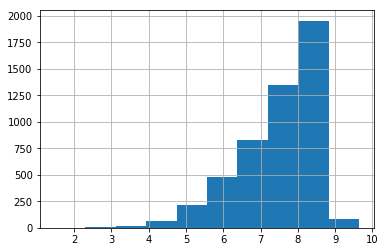

In [44]:
v.idf.hist()


keeping only the words with top idf values from our vocab and tokens:

In [46]:
my_v = v.term_str.tolist()

In [49]:
tokens = tokens[tokens.token_str.isin(my_v)]
vocab = vocab[vocab.term_str.isin(my_v)]

In [50]:
vocab.shape

(4988, 5)

### Creating topics table

In [70]:
topics = pd.DataFrame(index=range(n_topics))
topics.index.name = 'topic_id'

## Defining Functions

### Randomly assign topics to tokens

In [98]:
def init_topics(tokens):
    tokens['topic_id'] = np.random.randint(0, n_topics, len(tokens))
    return tokens

### Generate count matrices

In [99]:
def get_DT(tokens):
    return tokens.groupby(['reviewID','topic_id']).topic_id.count()\
        .unstack().fillna(0).astype('int')

In [100]:
def get_WT(tokens):
    return tokens.groupby(['topic_id','term_id']).term_id.count()\
        .unstack().fillna(0).astype('int').T

In [117]:
def get_DTP(dt):
    return (dt.T / dt.T.sum()).T

In [125]:
def get_WTP(wt):
    wtp = wt / wt.sum()
    wtp['term_str'] = vocab.term_str
    wtp = wtp.set_index('term_str')
    return wtp

In [103]:
def get_topic_seeds(wt):
    seeds = pd.DataFrame([(t, wt[t].sort_values().idxmax()) for t in range(n_topics)], columns=['t','w'])
    seeds = seeds.set_index('t')
    seeds['term_str'] = seeds.w.map(vocab.term_str)
    seeds = seeds.sort_values('term_str')
    return seeds

In [104]:
def get_doc_seeds(dt):
    seeds = pd.DataFrame([(d, DT.loc[d].idxmax()) for d in DT.index], columns=['d','t'])
    seeds = seeds.set_index('d')
    return seeds

In [119]:
def add_topic_info(topics, dt, wt, n_words = 7):
    dtp = get_DTP(dt)
    wtp = get_WTP(wt)
    topics['top_words'] = ''
    topics['top_words'] = topics.apply(lambda x: ' '.join(wtp[x.name].sort_values(ascending=False).head(n_words).index.values), 1)    
    topics['df_max'] = topics.apply(lambda x: dtp[x.name].max(), 1)
    topics['df_mean'] = topics.apply(lambda x: dtp[x.name].mean(), 1)
    topics['df_sum'] = topics.apply(lambda x: dtp[x.name].sum(), 1)
    topics['n_words'] = topics.apply(lambda x: wt[x.name].sum(), 1)
    return topics

### Print Topics

In [106]:
def plot_topics(wtp, n=5):
    fig, axes = plt.subplots(nrows=n_topics, ncols=1, sharex=True)
    for t in range(n_topics):
        wtp[t].sort_values(ascending=True).tail(10).plot(kind='barh', ax=axes[t], figsize=(5,80))
        axes[t].set_title('Topic {}'.format(t))

In [107]:
def get_new_topic(row):
    
    d = row.name[0] # doc_id
    k = row.name[1] # token_num (not used)
    z = row.topic_id
    w = row.term_id
    
    DT.at[d,z] -= 1
    WT.at[w,z] -= 1
    
    p_z = DT.loc[d] * (WT.loc[w] / WT.sum())
    z_weights = p_z / p_z.sum()

    z1 = topics.sample(weights=z_weights).index.values[0]

    DT.at[d,z1] += 1
    WT.at[w,z1] += 1
    
    return z1

## Generate model for all games

In [112]:
tokens = init_topics(tokens)
DT = get_DT(tokens) + alpha
WT = get_WT(tokens) + beta
topic_seeds = get_topic_seeds(WT)
doc_seeds = get_doc_seeds(WT)

In [113]:
doc_seeds.t.value_counts()

0    23032
1    17927
2    14790
3    12143
4    10625
Name: t, dtype: int64

In [114]:
for i in range(n_iters):
    print(i, end=' ')
    tokens['topic_id'] = tokens.apply(get_new_topic, 1)
print('Done')

0 1 2 3 4 Done


In [171]:
tokens.head()
tokens.to_csv('tokens_with_topics.csv')

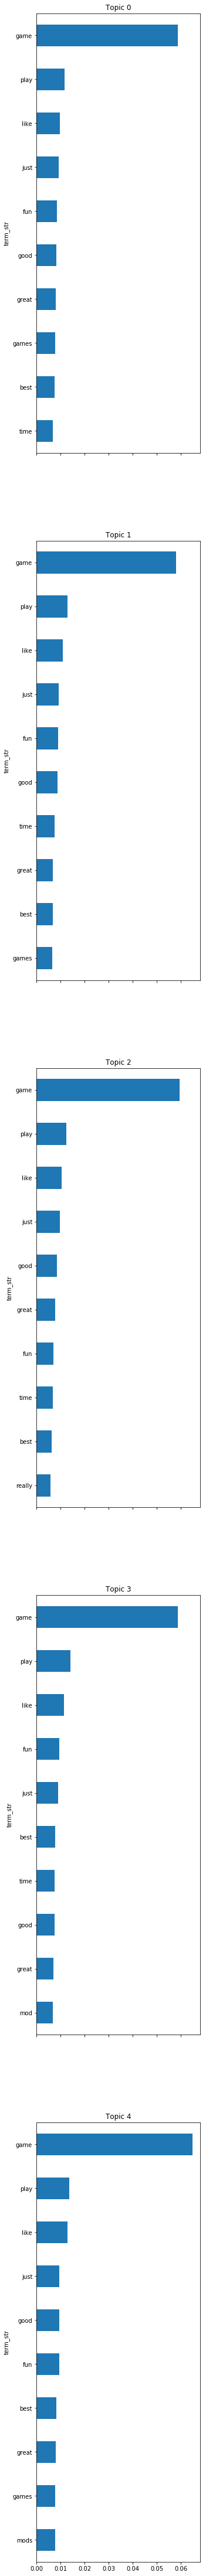

In [146]:
plot_topics(get_WTP(WT), 5)

### Using Mallet

In [150]:
def gather_tokens(df, level=0, col='token', glue=' ', collapse=False):
    idx = df.index.names[:level+1]
    df2 = df.groupby(idx)[col].apply(lambda x: glue.join(x))
    return df2

In [155]:
corpus = gather_tokens(tokens, level=2, col='term_str')\
    .reset_index().rename(columns={'term_str':'doc_content'})

In [156]:
corpus['doc_label'] = corpus.apply(lambda x: x.reviewID, 1)

In [157]:
corpus.head()

,reviewID,tokenID,doc_content,doc_label
0,0,3,game,0
1,0,8,ends,0
2,0,11,picked,0
3,0,13,game,0
4,0,15,thinking,0


In [158]:
corpus[['doc_label','doc_content']].to_csv('reviews-corpus.csv', index=False)

In [160]:
!~/Downloads/mallet-2.0.8/bin/mallet

Unrecognized command: 
Mallet 2.0 commands: 

  import-dir         load the contents of a directory into mallet instances (one per file)
  import-file        load a single file into mallet instances (one per line)
  import-svmlight    load SVMLight format data files into Mallet instances
  info               get information about Mallet instances
  train-classifier   train a classifier from Mallet data files
  classify-dir       classify data from a single file with a saved classifier
  classify-file      classify the contents of a directory with a saved classifier
  classify-svmlight  classify data from a single file in SVMLight format
  train-topics       train a topic model from Mallet data files
  infer-topics       use a trained topic model to infer topics for new documents
  evaluate-topics    estimate the probability of new documents under a trained model
  prune              remove features based on frequency or information gain
  split              divide data into testing, tr

In [173]:
!~/Downloads/mallet-2.0.8/bin/mallet import-file --input reviews-corpus.csv --output reviews-corpus.mallet --keep-sequence TRUE

In [176]:
!~/Downloads/mallet-2.0.8/bin/mallet train-topics --input reviews-corpus.mallet --num-topics {num_topics} --num-iterations {num_iters} \
--output-doc-topics reviews-doc-topics.txt \
--output-topic-keys reviews-topic-keys.txt \
--word-topic-counts-file reviews-word-topic-counts-file.txt \
--topic-word-weights-file reviews-topic-word-weights-file.txt \
--xml-topic-report reviews-topic-report.xml \
--xml-topic-phrase-report reviews-topic-phrase-report.xml \
--show-topics-interval {show_interval} \
--use-symmetric-alpha false  \
--optimize-interval 100 \
--diagnostics-file reviews-diagnostics.xml

Mallet LDA: 20 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 0
total tokens: 0
Infinite value after topic 0 0
<10> LL/token: �
Infinite value after topic 0 0
<20> LL/token: �
Infinite value after topic 0 0
<30> LL/token: �
Infinite value after topic 0 0
<40> LL/token: �
Infinite value after topic 0 0
<50> LL/token: �
Infinite value after topic 0 0
<60> LL/token: �
Infinite value after topic 0 0
<70> LL/token: �
Infinite value after topic 0 0
<80> LL/token: �
Infinite value after topic 0 0
<90> LL/token: �

0	0.25	
1	0.25	
2	0.25	
3	0.25	
4	0.25	
5	0.25	
6	0.25	
7	0.25	
8	0.25	
9	0.25	
10	0.25	
11	0.25	
12	0.25	
13	0.25	
14	0.25	
15	0.25	
16	0.25	
17	0.25	
18	0.25	
19	0.25	

Infinite value after topic 0 0
<100> LL/token: �
Infinite value after topic 0 0
<110> LL/token: �
Infinite value after topic 0 0
<120> LL/token: �
Infinite value after topic 0 0
<130> LL/token: �
Infinite value after topic 0 0
<140> LL/token: �
Infinite value after topic 0 0
<150> LL/token: �
Infin

## To Compare between the games

To really see the difference in topics among the games, I will be changing the source data frames so that the primary identifying document is the name of the game instead of the review. I could combine all the reviews into a single long text too.

### Reading back 

In [177]:
rev_all = pd.read_csv('steam_revs_processed.csv')
tokens = pd.read_csv('tokens.csv')
tokens.set_index(['reviewID','tokenID'], inplace=True)
vocab = pd.read_csv('vocab.csv')
vocab.set_index(['term_id'], inplace=True)

In [184]:
rev_all.head()

,achievement_progress.num_achievements_attained,achievement_progress.num_achievements_percentage,achievement_progress.num_achievements_possible,date_posted,date_updated,found_helpful_percentage,friend_player_level,num_badges,num_comments,num_found_funny,...,orig_url,profile_url,rating,review,review_url,steam_id_number,total_game_hours,total_game_hours_last_two_weeks,username,file
0,82.0,0.931818,88.0,"Dec 26, 2013, 1:06PM",NaN,0.953098,19.0,15.0,261,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/profiles/76561198025...,Recommended,"this is the game the never, ever ends. i picke...",http://steamcommunity.com/profiles/76561198025...,76561198025183555,4653.0,0.0,WafflePotatoPancake,The Elder Scrolls V
1,75.0,1.000000,75.0,"Dec 18, 2013, 1:07PM",NaN,0.950018,25.0,20.0,281,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/thardrain,Recommended,ruined my life. five stars.,http://steamcommunity.com/id/thardrain/recomme...,thardrain,3210.9,0.0,Robn,The Elder Scrolls V
2,44.0,0.500000,88.0,"Jun 14, 2014, 4:32PM",NaN,0.898292,12.0,13.0,60,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/profiles/76561198112...,Recommended,i was stacking books on a shelf in my house in...,http://steamcommunity.com/profiles/76561198112...,76561198112775620,92.5,0.0,Dovah,The Elder Scrolls V
3,NaN,NaN,NaN,"Nov 25, 2013, 11:44AM","Nov 25, 2013, 11:44AM",0.881725,NaN,NaN,11,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/Rgeers,Recommended,"best game i ever bought. in this game, you'll ...",http://steamcommunity.com/id/Rgeers/recommende...,Rgeers,313.1,0.0,Rgeers,The Elder Scrolls V
4,0.0,0.000000,40.0,"Jun 29, 2014, 5:30PM",NaN,0.873712,84.0,114.0,101,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/Terminally-Chill,Recommended,playing skyrim is like masturbating. feels goo...,http://steamcommunity.com/id/Terminally-Chill/...,Terminally-Chill,794.9,2.3,-AoG-SHARKE BYTE [FYG],The Elder Scrolls V


In [185]:
#Cleaning again:
rev_all.review = rev_all.review.str.lower()
#rev_all.review = rev_all.review.str.replace('[^a-zA-Z]'," ")
rev_all.review = rev_all.review.str.replace(r'\n',' ')
rev_all.review = rev_all.review.str.replace(r'\s+',' ')
rev_all.review = rev_all.review.str.replace('([ ]{2,})',' ')
rev_all = rev_all[~rev_all.review.str.match(r'^\s*$')]

In [186]:
rev_all.head()

,achievement_progress.num_achievements_attained,achievement_progress.num_achievements_percentage,achievement_progress.num_achievements_possible,date_posted,date_updated,found_helpful_percentage,friend_player_level,num_badges,num_comments,num_found_funny,...,orig_url,profile_url,rating,review,review_url,steam_id_number,total_game_hours,total_game_hours_last_two_weeks,username,file
0,82.0,0.931818,88.0,"Dec 26, 2013, 1:06PM",NaN,0.953098,19.0,15.0,261,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/profiles/76561198025...,Recommended,"this is the game the never, ever ends. i picke...",http://steamcommunity.com/profiles/76561198025...,76561198025183555,4653.0,0.0,WafflePotatoPancake,The Elder Scrolls V
1,75.0,1.000000,75.0,"Dec 18, 2013, 1:07PM",NaN,0.950018,25.0,20.0,281,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/thardrain,Recommended,ruined my life. five stars.,http://steamcommunity.com/id/thardrain/recomme...,thardrain,3210.9,0.0,Robn,The Elder Scrolls V
2,44.0,0.500000,88.0,"Jun 14, 2014, 4:32PM",NaN,0.898292,12.0,13.0,60,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/profiles/76561198112...,Recommended,i was stacking books on a shelf in my house in...,http://steamcommunity.com/profiles/76561198112...,76561198112775620,92.5,0.0,Dovah,The Elder Scrolls V
3,NaN,NaN,NaN,"Nov 25, 2013, 11:44AM","Nov 25, 2013, 11:44AM",0.881725,NaN,NaN,11,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/Rgeers,Recommended,"best game i ever bought. in this game, you'll ...",http://steamcommunity.com/id/Rgeers/recommende...,Rgeers,313.1,0.0,Rgeers,The Elder Scrolls V
4,0.0,0.000000,40.0,"Jun 29, 2014, 5:30PM",NaN,0.873712,84.0,114.0,101,1,...,http://steamcommunity.com/app/72850/homeconten...,http://steamcommunity.com/id/Terminally-Chill,Recommended,playing skyrim is like masturbating. feels goo...,http://steamcommunity.com/id/Terminally-Chill/...,Terminally-Chill,794.9,2.3,-AoG-SHARKE BYTE [FYG],The Elder Scrolls V


In [193]:
groupedRevs = rev_all[['file', 'review']].groupby('file')['review'].apply(lambda x: "{%s}" % ', '.join(x))

In [ ]:
tokens = rev_all.review\
    .apply(lambda x: pd.Series(nltk.pos_tag(nltk.word_tokenize(x))))\
    .stack()\
    .to_frame()\
    .rename(columns={0:'pos_tuple'})
tokens.index.names = ['reviewID', 'tokenID']
tokens.head()

In [221]:
revs = groupedRevs.to_frame()
revs.head()

,review
file,
Arma 3,{my first game on a3 brought me the most horri...
Counter Strike,"{ruined my life., this will be more of a ''my ..."
Counter Strike Global Offensive,{if i had a dollar for each time someone screa...
Dota 2,{this game taught me about the diversity of cu...
Football Manager 2015,{ive bought this game for many years and think...


### Tokenizing using NLTK POS tagging

In [222]:
tokens = revs.review\
    .apply(lambda x: pd.Series(nltk.pos_tag(nltk.word_tokenize(x))))\
    .stack()\
    .to_frame()\
    .rename(columns={0:'pos_tuple'})
tokens.index.names = ['file', 'tokenID']
tokens.head()

pos_tuple
file   tokenID             
Arma 3 0             ({, ()
       1         (my, PRP$)
       2        (first, JJ)
       3         (game, NN)
       4           (on, IN)

In [ ]:
tokens['pos'] = tokens.pos_tuple.apply(lambda x: x[1])
tokens['token_str'] = tokens.pos_tuple.apply(lambda x: x[0])
tokens = tokens.drop('pos_tuple', 1)

In [226]:
tokens['punc'] = tokens.token_str.str.match(r'^[\W_]*$').astype('int')
tokens['num'] = tokens.token_str.str.match(r'^.*\d.*$').astype('int')
tokens.head()

pos token_str  punc  num
file   tokenID                           
Arma 3 0           (         {     1    0
       1        PRP$        my     0    0
       2          JJ     first     0    0
       3          NN      game     0    0
       4          IN        on     0    0

In [227]:
WORDS = (tokens.punc == 0) & (tokens.num == 0)
tokens.loc[WORDS, 'term_str'] = tokens.token_str.str.lower()\
        .str.replace(r'["_*.]', '')

In [233]:
tokens['term_id'] = tokens['term_str'].map(vocab.reset_index()\
        .set_index('term_str').term_id).fillna(-1).astype('int')

In [234]:
tokens.head()

pos token_str  punc  num term_str  term_id
file   tokenID                                             
Arma 3 0           (         {     1    0      NaN       -1
       1        PRP$        my     0    0       my    40089
       2          JJ     first     0    0    first    23884
       3          NN      game     0    0     game    25809
       4          IN        on     0    0       on    42406

### Save Files

In [235]:
rev_all.to_csv('gamerevs_processed.csv',index=False)
tokens.to_csv('gametokens.csv')
vocab.to_csv('vocab.csv')

### Extracting BOW and tokenizing

In [ ]:
WORDS =  (tokens.punc == 0) & (tokens.num == 0) & tokens.term_id.isin(vocab[vocab.stop==0].index)
WORDS.head()

In [237]:
term_id = 'term_id'
file = 'file'
BOW = tokens[WORDS].groupby([file, term_id])['term_id'].count()
BOW.head()

file    term_id
Arma 3  20         1
        37         1
        140        1
        149        1
        152        2
Name: term_id, dtype: int64

In [241]:
vectorizer = TfidfVectorizer(use_idf=1, stop_words='english', token_pattern=r'[A-Za-z][A-Za-z][A-Za-z]+', max_features=10000)
X = vectorizer.fit_transform(rev_all.review.tolist())
v = pd.DataFrame(vectorizer.get_feature_names(), columns=['term_str'])
v['idf'] = vectorizer.idf_

In [242]:
v.sort_values('idf', ascending=False).head(10)


,term_str,idf
382,aphro,11.589585
3978,gudeg,11.589585
7009,raunchy,11.589585
9270,twinkies,11.589585
4094,hatty,11.589585
9997,zrenjanin,11.589585
4162,heilcopter,11.589585
9491,valkyrieflight,11.589585
9329,understandle,11.589585
3561,franco,11.589585


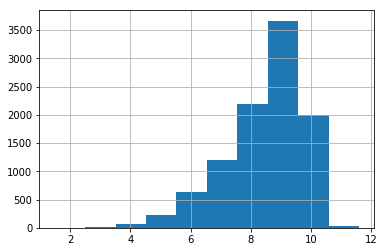

In [243]:
v['idf'].hist()

In [245]:
#Selecting only values above 8:
vectorizer = TfidfVectorizer(use_idf=1, stop_words='english', token_pattern=r'[A-Za-z][A-Za-z][A-Za-z]+', min_df=8, max_features=10000)
X = vectorizer.fit_transform(rev_all.review.tolist())
v = pd.DataFrame(vectorizer.get_feature_names(), columns=['term_str'])
v['idf'] = vectorizer.idf_

In [246]:
tokens = tokens[tokens.token_str.isin(my_v)]
vocab = vocab[vocab.term_str.isin(my_v)]
vocab.shape

(4988, 5)

In [247]:
#Recreate topics table
topics = pd.DataFrame(index=range(n_topics))
topics.index.name = 'topic_id'

Since most of our functions work with index 'reviewID', I am going to rename file as 'reviewID' for convenience here.

In [251]:
tokens.index.names=['reviewID', 'tokenID']

In [252]:
tokens = init_topics(tokens)
DT = get_DT(tokens) + alpha
WT = get_WT(tokens) + beta
topic_seeds = get_topic_seeds(WT)
doc_seeds = get_doc_seeds(WT)

In [253]:
doc_seeds.t.value_counts()

3    3
2    3
0    3
1    2
Name: t, dtype: int64

In [255]:
for i in range(n_iters):
    print(i, end=' ')
    tokens['topic_id'] = tokens.apply(get_new_topic, 1)
print('Done')

0 1 2 3 4 Done


In [257]:
tokens.head()
tokens.to_csv('tokens_games_with_topics.csv')

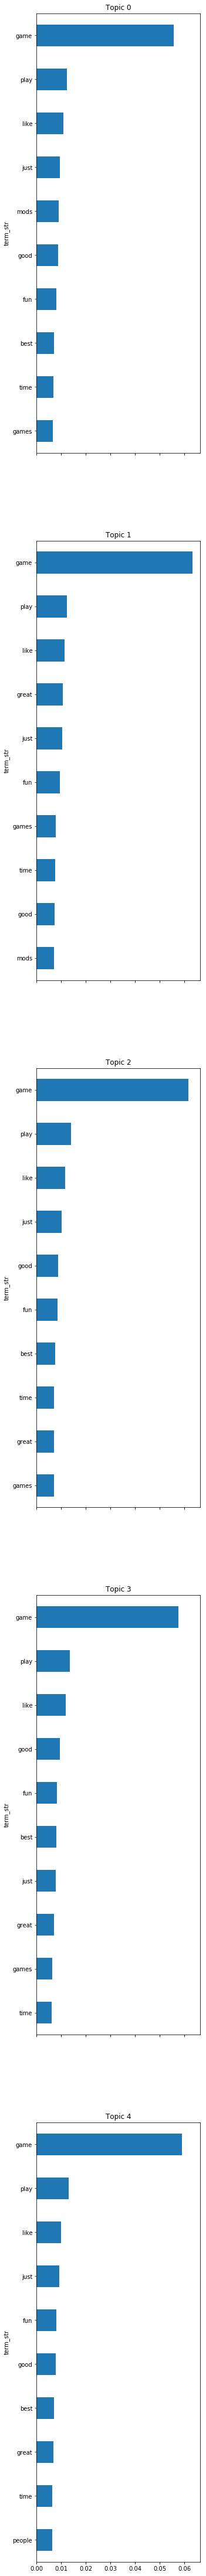

In [274]:
#plot_topics(get_WTP(WT), 5)
plot_topics(get_WTP(WT))

### Using Mallet

In [262]:
corpus = gather_tokens(tokens, level=2, col='term_str')\
    .reset_index().rename(columns={'term_str':'doc_content'})

In [264]:
corpus['doc_label'] = corpus.apply(lambda x: x.reviewID, 1)

In [265]:
corpus[['doc_label','doc_content']].to_csv('reviews-games-corpus.csv', index=False)

In [266]:
!~/Downloads/mallet-2.0.8/bin/mallet import-file --input reviews-games-corpus.csv --output reviews-games-corpus.mallet --keep-sequence TRUE

In [267]:
!~/Downloads/mallet-2.0.8/bin/mallet train-topics --input reviews-games-corpus.mallet --num-topics {num_topics} --num-iterations {num_iters} \
--output-doc-topics reviews2-doc-topics.txt \
--output-topic-keys reviews2-topic-keys.txt \
--word-topic-counts-file reviews2-word-topic-counts-file.txt \
--topic-word-weights-file reviews2-topic-word-weights-file.txt \
--xml-topic-report reviews2-topic-report.xml \
--xml-topic-phrase-report reviews2-topic-phrase-report.xml \
--show-topics-interval {show_interval} \
--use-symmetric-alpha false  \
--optimize-interval 100 \
--diagnostics-file reviews2-diagnostics.xml

Mallet LDA: 20 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 2
total tokens: 1735498
<10> LL/token: -10.84909
<20> LL/token: -10.35468
<30> LL/token: -9.81492
<40> LL/token: -9.59977
<50> LL/token: -9.48224
<60> LL/token: -9.41653
<70> LL/token: -9.37624
<80> LL/token: -9.34714
<90> LL/token: -9.32416

0	0.25	auto v,game v,online v,fun v,worth v,gta v,play v,did v,heists v,price v,story v,players v,singleplayer v,rockstar v,update v,year v,good v,xbox v,waiting v,great 
1	0.25	auto v,game v,graphics v,rockstar v,buy v,just v,run v,person v,way v,does v,single v,time v,money v,start v,finally v,gta v,days v,use v,patch v,played 
2	0.25	auto v,game v,gta v,good v,play v,people v,rockstar v,fun v,online v,really v,player v,missions v,mission v,multiplayer v,better v,just v,issue v,banned v,price v,problems 
3	0.25	auto v,gta v,online v,sale v,loading v,ing v,game v,times v,story v,using v,version v,price v,hackers v,did v,port v,load v,cars v,business v,fix v,friends 
4	

[beta: 0.01118] 
<300> LL/token: -9.18605
<310> LL/token: -9.17202
<320> LL/token: -9.17368
<330> LL/token: -9.17125
<340> LL/token: -9.17199
<350> LL/token: -9.16844
<360> LL/token: -9.16654
<370> LL/token: -9.16464
<380> LL/token: -9.16364
<390> LL/token: -9.16359

0	0.22417	auto v,game v,people v,story v,price v,rockstar v,play v,better v,gameplay v,players v,just v,singleplayer v,worth v,great v,base v,club v,really v,year v,xbox v,big 
1	0.22438	auto v,buy v,game v,just v,graphics v,does v,single v,run v,use v,gta v,things v,way v,person v,bit v,release v,right v,looks v,say v,times v,social 
2	0.22405	auto v,fun v,play v,version v,gta v,multiplayer v,missions v,game v,online v,having v,able v,people v,want v,know v,good v,problems v,heist v,real v,mission v,graphics 
3	0.22448	auto v,gta v,online v,sale v,did v,worth v,friends v,ing v,grand v,card v,issues v,port v,hackers v,cars v,story v,dont v,bad v,job v,load v,driving 
4	0.22363	auto v,game v,good v,really players v,like for

<570> LL/token: -9.08971
<580> LL/token: -9.08996
<590> LL/token: -9.08993

0	0.18192	auto v,people v,game v,story v,play v,worth v,great v,better v,players v,gameplay v,price v,playing v,singleplayer v,fix v,club v,little v,base v,year v,xbox v,running 
1	0.18236	auto v,just v,buy v,graphics v,does v,say v,times v,lot v,game v,things v,person v,bit v,release v,actually v,crashes v,way v,looks v,start v,use v,finally 
2	0.18153	auto v,fun v,play v,online v,version v,missions v,able v,gta v,settings v,far v,having v,real v,problems v,launch v,heist v,want v,issue v,mission v,know v,issues 
3	0.18185	auto v,gta v,online v,sale v,did v,friends v,hackers v,ing v,grand v,port v,cars v,dont v,story v,minutes v,card v,bad v,job v,load v,driving v,shark 
4	0.1808	auto v,game v,really v,good fortress v,awesome v,amazing v,buy v,bought v,like v,getting v,pretty v,old v,best v,review fps v,said v,let v,random v,instead 
5	0.18023	auto scrolls v,game v,time v,played v,love v,best v,thing v,need v,

[beta: 0.01102] 
<800> LL/token: -9.0561
<810> LL/token: -9.03438
<820> LL/token: -9.03185
<830> LL/token: -9.03082
<840> LL/token: -9.03104
<850> LL/token: -9.03106
<860> LL/token: -9.03289
<870> LL/token: -9.03194
<880> LL/token: -9.02964
<890> LL/token: -9.02888

0	0.12818	auto v,game v,people v,story v,worth v,playing v,play v,price v,better v,players v,fix v,singleplayer v,base v,year v,xbox v,little v,running v,look v,club v,gameplay 
1	0.1285	auto v,graphics v,game v,run v,buy v,say v,does v,just v,times v,lot v,things v,right v,single v,did v,person v,release v,start v,crashes v,looks v,bit 
2	0.12793	auto v,fun v,play v,online v,version v,want v,missions v,dont v,able v,settings v,having v,know v,launch v,heist v,real v,far v,issue v,gta v,problems v,mission 
3	0.1281	auto v,gta v,online v,sale v,hackers v,did v,issues v,grand v,card v,port v,think v,cars v,bad v,ing v,friends v,minutes v,job v,wanted v,load v,driving 
4	0.12673	auto v,game v,really v,good v,buy v,like v,bough

pos   token_str  punc  num    term_str  term_id  topic_id
reviewID tokenID                                                           
Arma 3   3         NN        game     0    0        game    25809         0
         6        VBN     brought     0    0     brought    10499         4
         11        NN  experience     0    0  experience    22410         0
         18        NN        game     0    0        game    25809         4
         26        NN         way     0    0         way    65186         4